In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype(float)
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=( 28, 28, 1 ), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=0,callbacks=[early_stopping_callback,checkpoint])


Epoch 00001: val_loss improved from inf to 0.05887, saving model to ./model\01-0.0589.hdf5

Epoch 00002: val_loss improved from 0.05887 to 0.04369, saving model to ./model\02-0.0437.hdf5

Epoch 00003: val_loss improved from 0.04369 to 0.03591, saving model to ./model\03-0.0359.hdf5

Epoch 00004: val_loss improved from 0.03591 to 0.03230, saving model to ./model\04-0.0323.hdf5

Epoch 00005: val_loss did not improve from 0.03230

Epoch 00006: val_loss did not improve from 0.03230

Epoch 00007: val_loss improved from 0.03230 to 0.03158, saving model to ./model\07-0.0316.hdf5

Epoch 00008: val_loss improved from 0.03158 to 0.02790, saving model to ./model\08-0.0279.hdf5

Epoch 00009: val_loss improved from 0.02790 to 0.02749, saving model to ./model\09-0.0275.hdf5

Epoch 00010: val_loss did not improve from 0.02749

Epoch 00011: val_loss did not improve from 0.02749

Epoch 00012: val_loss did not improve from 0.02749

Epoch 00013: val_loss did not improve from 0.02749

Epoch 00014: val_lo

In [7]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 3s 10ms/step - loss: 0.0287 - accuracy: 0.9926

 Test Accuracy: 0.9926


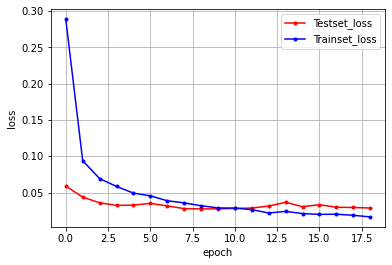

In [8]:
Y_vloss = history.history['val_loss'] # Test
Y_loss = history.history['loss'] # Training

x_len = np.arange(len(Y_loss))
plt.plot(x_len, Y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, Y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()